In [42]:
import spotipy
from dotenv import load_dotenv
import pandas as pd
import numpy as np

In [2]:
load_dotenv()

True

In [3]:
scope = ['ugc-image-upload'
        ,'user-read-recently-played'
        ,'user-top-read'
        ,'user-read-playback-position'
        ,'user-read-playback-state'
        ,'user-modify-playback-state'
        ,'user-read-currently-playing'
        ,'app-remote-control'
        ,'streaming'
        ,'playlist-modify-public'
        ,'playlist-modify-private'
        ,'playlist-read-private'
        ,'playlist-read-collaborative'
        ,'user-follow-modify'
        ,'user-follow-read'
        ,'user-library-modify'
        ,'user-library-read'
        ,'user-read-email'
        ,'user-read-private'
        ]


auth_manager = spotipy.oauth2.SpotifyOAuth(scope=scope,
                                            show_dialog=True)

# auth_manager.get_access_token(request.args.get("code"))
auth_url = auth_manager.get_authorize_url()
spotify = spotipy.Spotify(auth_manager=auth_manager)


In [4]:
artists_items = spotify.current_user_top_artists(limit=100, time_range='long_term')['items']

In [15]:
spotify.search('Drake', type='artist', limit=1)['artists']['items'][0]['images'][0]['url']

'https://i.scdn.co/image/60cfab40c6bb160a1906be45276829d430058005'

In [111]:
temp = pd.DataFrame.from_dict(artists_items)

In [124]:
def clean_top_artists(items_df):
    '''
        
    '''

    items_df['external_urls'] = temp['external_urls'].map(lambda x: x['spotify'])
    items_df['images'] = temp['images'].map(lambda x: x[0]['url'])
    items_df['followers'] = temp['followers'].map(lambda x: x['total'])

    return items_df

In [125]:
def clean_top_tracks(tracks_df):
    '''
        
    '''
    tracks_df['album_name'] = temp['album'].map(lambda x:x['name'])
    tracks_df['album_art'] = temp['album'].map(lambda x:x['images'][0]['url'])
    tracks_df['album_href'] = temp['album'].map(lambda x:x['href'])
    tracks_df['album_release_date'] = temp['album'].map(lambda x:x['release_date'])

    tracks_df['artist_names'] = temp['artists'].map(lambda x: ', '.join([a['name'] for a in x]))

    drop_cols = ['album', 'artists', 'available_markets', 'disc_number', 'external_ids', 'is_local', 'external_urls',\
                 'track_number', 'duration_ms', 'episode', 'track', 'uri',\
                     'preview_url', 'type',	'album_name', 'album_href' ]
    tracks_df = tracks_df.drop(drop_cols, axis=1)

    return tracks_df

In [126]:
def clean_playlist(user_playlists, playlist):
    '''

    '''

    filter_playlist = [i for i in spotify.current_user_playlists()['items'] if i['name']==playlist_name][0]
    filter_id = filter_playlist['id']
    playlist_filter_id = spotify.playlist(filter_id)
    playlist_tracks = playlist_filter_id['tracks']
    list_tracks = [playlist_tracks['items'][i]['track'] for i in range(filter_playlist['tracks']['total'])]
    temp = pd.DataFrame.from_dict(list_tracks)
    temp_df = clean_top_tracks(temp)

    return temp_df

In [127]:
def audio_playlist_features(playlist_df):
    '''

    '''
    df = pd.DataFrame.from_dict([spotify.audio_features(playlist_df['id'][i])[0] for i in range(len(playlist_df))])
    drop_cols = ['analysis_url', 'duration_ms', 'time_signature', 'uri', 'track_href', 'type']
    audio_df = df.drop(drop_cols, axis=1)

    return audio_df

In [128]:
term = 'short'

In [129]:
track_items =spotify.current_user_top_tracks(limit=100, time_range=f'{term}_term')['items']

In [130]:
temp = pd.DataFrame.from_dict(track_items)

In [131]:
temp.head()

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",1,189486,True,{'isrc': 'USAT21812918'},{'spotify': 'https://open.spotify.com/track/1w...,https://api.spotify.com/v1/tracks/1wJRveJZLSb1...,1wJRveJZLSb1rjhnUHQiv6,False,Swervin (feat. 6ix9ine),79,https://p.scdn.co/mp3-preview/4c2dc4b8977f9b92...,4,track,spotify:track:1wJRveJZLSb1rjhnUHQiv6
1,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",1,214466,True,{'isrc': 'USCM51800121'},{'spotify': 'https://open.spotify.com/track/3q...,https://api.spotify.com/v1/tracks/3qN5qMTKyEEm...,3qN5qMTKyEEmiTZD38BNTT,False,I'm Upset,70,None,6,track,spotify:track:3qN5qMTKyEEmiTZD38BNTT
2,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, CH, C...",1,223973,True,{'isrc': 'USAT21501575'},{'spotify': 'https://open.spotify.com/track/0h...,https://api.spotify.com/v1/tracks/0hy1SOTEn9if...,0hy1SOTEn9ifXTzOwnCwEr,False,All Eyes on You (feat. Chris Brown & Nicki Minaj),68,https://p.scdn.co/mp3-preview/fcedb388373c9feb...,4,track,spotify:track:0hy1SOTEn9ifXTzOwnCwEr
3,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, CH, C...",1,197133,True,{'isrc': 'USAT21501693'},{'spotify': 'https://open.spotify.com/track/0Y...,https://api.spotify.com/v1/tracks/0Y0TOsE1q11q...,0Y0TOsE1q11qgbi7c5WZsG,False,R.I.C.O. (feat. Drake),71,https://p.scdn.co/mp3-preview/d5f29c79f1f3e5fc...,6,track,spotify:track:0Y0TOsE1q11qgbi7c5WZsG
4,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",1,173986,False,{'isrc': 'USCM51600028'},{'spotify': 'https://open.spotify.com/track/1z...,https://api.spotify.com/v1/tracks/1zi7xx7UVEFk...,1zi7xx7UVEFkmKfv06H8x0,False,One Dance,84,None,12,track,spotify:track:1zi7xx7UVEFkmKfv06H8x0


In [120]:
temp_df = clean_top_tracks(temp)

KeyError: "['episode' 'track'] not found in axis"

In [196]:
len(temp_df)

50

In [197]:
temp_df.to_csv(f'top_tracks_{term}.csv')

In [3]:
playlists= ['229Jams',
 'Lorem',
 'RapCaviar',
 'Discover Weekly',
 'Hindi Songs - Mega Hit Mix - Bollywood songs - All time top 1000 songs',
 'Coffee Table Jazz',
 'Body Radio',
 'Classical Upbeat Piano',
 'Best of the Decade For You',
 'Your Top Songs 2019',
 'Hot Rhythmic',
 'lofi hip hop music - beats to relax/study to',
 'Late Night Jazz',
 'Liked from Radio',
 'Kimi No Nawa (Your Name) OST | RADWIMPS 💫 ',
 'Moood🤙',
 'All Out 10s',
 'Hamilton!']

In [9]:
playlists_kv = [dict([('label', k), ('value', k)]) for k in playlists]
playlists_kv

[{'label': '229Jams', 'value': '229Jams'},
 {'label': 'Lorem', 'value': 'Lorem'},
 {'label': 'RapCaviar', 'value': 'RapCaviar'},
 {'label': 'Discover Weekly', 'value': 'Discover Weekly'},
 {'label': 'Hindi Songs - Mega Hit Mix - Bollywood songs - All time top 1000 songs',
  'value': 'Hindi Songs - Mega Hit Mix - Bollywood songs - All time top 1000 songs'},
 {'label': 'Coffee Table Jazz', 'value': 'Coffee Table Jazz'},
 {'label': 'Body Radio', 'value': 'Body Radio'},
 {'label': 'Classical Upbeat Piano', 'value': 'Classical Upbeat Piano'},
 {'label': 'Best of the Decade For You',
  'value': 'Best of the Decade For You'},
 {'label': 'Your Top Songs 2019', 'value': 'Your Top Songs 2019'},
 {'label': 'Hot Rhythmic', 'value': 'Hot Rhythmic'},
 {'label': 'lofi hip hop music - beats to relax/study to',
  'value': 'lofi hip hop music - beats to relax/study to'},
 {'label': 'Late Night Jazz', 'value': 'Late Night Jazz'},
 {'label': 'Liked from Radio', 'value': 'Liked from Radio'},
 {'label': 'Ki

In [132]:
user_playlists = [i['name'] for i in spotify.current_user_playlists()['items']]
len(user_playlists)

18

In [133]:
playlist_name = 'Kimi No Nawa (Your Name) OST | RADWIMPS 💫 '

In [134]:
# playlist_df.to_csv('playlist.csv')

In [135]:
# spotify.current_user_recently_played?

In [136]:
# spotify.current_user_recently_played()['items']

In [137]:
# def get_features(sp, track_id):
#     '''
#     Returns a dictionary of features features that is used in KNN model
    
#     artist: Artist for which features are needed - str
#     sp: Spotify Token - spotipy.client.Spotify
#     features: List of features to return - List
#     '''    
#     d = dict()
#     audio_features = sp.audio_features(track_id)[0]
#     for feats in features:
#         if feats not in d.keys():
#             if feats in audio_features:
#                 d[feats] = audio_features[feats]
#     return d

In [138]:
playlist_features = audio_playlist_features(playlist_df)

NameError: name 'playlist_df' is not defined

In [397]:
# playlist_features.to_csv('playlist_features.csv')

In [33]:
# spotify.current_user_saved_tracks(20)['items'][:2]

In [35]:
user_playlists = [i['name'] for i in spotify.current_user_playlists()['items']]
user_playlists

['229Jams',
 'Lorem',
 'RapCaviar',
 'Discover Weekly',
 'Hindi Songs - Mega Hit Mix - Bollywood songs - All time top 1000 songs',
 'Coffee Table Jazz',
 'Body Radio',
 'Classical Upbeat Piano',
 'Best of the Decade For You',
 'Your Top Songs 2019',
 'Hot Rhythmic',
 'lofi hip hop music - beats to relax/study to',
 'Late Night Jazz',
 'Liked from Radio',
 'Kimi No Nawa (Your Name) OST | RADWIMPS 💫 ',
 'Moood🤙',
 'All Out 10s',
 'Hamilton!']

In [108]:
final_df = pd.DataFrame()
for playlist_name in user_playlists:
    
    filter_playlist = [i for i in spotify.current_user_playlists()['items'] if i['name']==playlist_name][0]
    if filter_playlist['tracks']['total'] <5:
        continue
    print(playlist_name, filter_playlist['tracks']['total'])
    filter_id = filter_playlist['id']
    playlist_filter_id = spotify.playlist(filter_id)
    playlist_tracks = playlist_filter_id['tracks']
    list_tracks = [playlist_tracks['items'][i]['track'] for i in range(min(10, filter_playlist['tracks']['total']))]
    temp = pd.DataFrame.from_dict(list_tracks)
    # audio_playlist_features(clean_top_tracks(temp))
    c_tracks = clean_top_tracks(temp)
    audio_features = audio_playlist_features(c_tracks)
    merged_inner = pd.merge(left=c_tracks, right=audio_features, left_on='id', right_on='id')
    merged_inner['playlist_name'] = playlist_name
    # Stack the DataFrames on top of each other
    final_df = pd.concat([final_df, merged_inner], axis=0)

Lorem 178
RapCaviar 50
Discover Weekly 30
Hindi Songs - Mega Hit Mix - Bollywood songs - All time top 1000 songs 813
Coffee Table Jazz 149
Body Radio 50
Classical Upbeat Piano 12
Best of the Decade For You 100
Your Top Songs 2019 100
Hot Rhythmic 83
lofi hip hop music - beats to relax/study to 300
Late Night Jazz 100
Liked from Radio 5
Kimi No Nawa (Your Name) OST | RADWIMPS 💫  41
Moood🤙 21
All Out 10s 150
Hamilton! 36


In [ ]:
def get_tsne_csv(spotify, min_songs_per_playlist=5, k=10):
    '''
    '''
    user_playlists = [i['name'] for i in spotify.current_user_playlists()['items']]
    final_df = pd.DataFrame()
    for playlist_name in user_playlists:
        
        filter_playlist = [i for i in spotify.current_user_playlists()['items'] if i['name']==playlist_name][0]
        if filter_playlist['tracks']['total'] <min_songs_per_playlist:
            continue
        # print(playlist_name, filter_playlist['tracks']['total'])
        filter_id = filter_playlist['id']
        playlist_filter_id = spotify.playlist(filter_id)
        playlist_tracks = playlist_filter_id['tracks']
        list_tracks = [playlist_tracks['items'][i]['track'] for i in range(min(10, filter_playlist['tracks']['total']))]
        temp = pd.DataFrame.from_dict(list_tracks)

        c_tracks = clean_top_tracks(temp)
        audio_features = audio_playlist_features(c_tracks)
        merged_inner = pd.merge(left=c_tracks, right=audio_features, left_on='id', right_on='id')
        merged_inner['playlist_name'] = playlist_name

        # Stack the DataFrames on top of each other
        final_df = pd.concat([final_df, merged_inner], axis=0)

    # K Means - Predicted Genre feature 
    X = copy.deepcopy(final_df)
    song_features = pd.DataFrame()
    scaler = MinMaxScaler() # normalizer instance
    for col in X.columns: 
        if col not in ['artists','predicted_genres', 'href', 'id', 'name', 'playlist_name',  'album_art', 'artist_names',]:
            scaler.fit(X[[col]])
            song_features[col] = scaler.transform(X[col].values.reshape(-1,1)).ravel() 

    km = KMeans(n_clusters=k)
    predicted_genres = km.fit_predict(song_features)
    X['predicted_genres'] = predicted_genres

    return X

In [109]:
len(final_df)

165

In [110]:
final_df.head()

,explicit,href,id,name,popularity,album_art,artist_names,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_name
0,True,https://api.spotify.com/v1/tracks/1QL7nSDZCwZM...,1QL7nSDZCwZMnbisV4KOXt,t r a n s p a r e n t s o u l feat. Travis Barker,75,https://i.scdn.co/image/ab67616d0000b273e76af6...,"WILLOW, Travis Barker",0.390,0.830,11,-5.201,0,0.0563,0.00210,0.000000,0.156,0.191,90.021,Lorem
1,False,https://api.spotify.com/v1/tracks/26tMEDbutzry...,26tMEDbutzryy8RyHX8HX4,From These Heights,48,https://i.scdn.co/image/ab67616d0000b273336b84...,Jelani Aryeh,0.758,0.903,4,-3.909,1,0.0314,0.00949,0.000007,0.628,0.749,125.002,Lorem
2,False,https://api.spotify.com/v1/tracks/6xpDh0dXrkVp...,6xpDh0dXrkVp0Po1qrHUd8,Adam's Song,70,https://i.scdn.co/image/ab67616d0000b2736da502...,blink-182,0.520,0.775,0,-5.803,1,0.0348,0.03400,0.000000,0.364,0.382,136.028,Lorem
3,True,https://api.spotify.com/v1/tracks/0h7Vz5MQyJjO...,0h7Vz5MQyJjO4ZnMW7HTjV,Off the Rails,45,https://i.scdn.co/image/ab67616d0000b273cc66c7...,Wallice,0.476,0.798,1,-4.208,1,0.0394,0.05810,0.001800,0.276,0.738,168.179,Lorem
4,False,https://api.spotify.com/v1/tracks/3f9Xt5Bcu1Qo...,3f9Xt5Bcu1QooplxlTPEtb,Ur Gonna Wish U Believed Me,51,https://i.scdn.co/image/ab67616d0000b273caed83...,Cavetown,0.568,0.453,4,-7.453,1,0.0258,0.62600,0.022400,0.135,0.224,134.996,Lorem


In [43]:
# from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import joblib
import plotly.graph_objects as go
import copy
import matplotlib.pyplot as plt

%matplotlib inline


In [135]:
# Preprocessing data
X = copy.deepcopy(final_df)
song_features = pd.DataFrame()
scaler = MinMaxScaler() # normalizer instance

In [136]:
final_df.columns

Index(['explicit', 'href', 'id', 'name', 'popularity', 'album_art',
       'artist_names', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'playlist_name'],
      dtype='object')

In [137]:
for col in X.columns: 
    if col not in ['artists','predicted_genres', 'href', 'id', 'name', 'playlist_name',  'album_art', 'artist_names',]:
        scaler.fit(X[[col]])
        song_features[col] = scaler.transform(X[col].values.reshape(-1,1)).ravel() 

In [148]:
# # KMeans instance
# km = KMeans()
# k_rng = range(1,100)  # k value
# sse = [] # sse value for each k
# for i in k_rng:
#     km = KMeans(n_clusters = i)
#     km.fit(song_features.sample(100))
#     sse.append(km.inertia_) # calculating sse
# plt.plot(k_rng,sse)
# plt.xlabel('K value')
# plt.ylabel('SSE Error')
# plt.title('Best K value')
# plt.show()

In [139]:
# Train for k = 10
np.random.seed(3)
k = 10
km = KMeans(n_clusters=k)
predicted_genres = km.fit_predict(song_features)

In [140]:
song_features['predicted_genres'] = predicted_genres

In [144]:
X.shape, song_features.shape

((165, 19), (165, 14))

In [146]:
X['predicted_genres'] = predicted_genres

In [147]:
X

,explicit,href,id,name,popularity,album_art,artist_names,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_name,predicted_genres
0,True,https://api.spotify.com/v1/tracks/1QL7nSDZCwZM...,1QL7nSDZCwZMnbisV4KOXt,t r a n s p a r e n t s o u l feat. Travis Barker,75,https://i.scdn.co/image/ab67616d0000b273e76af6...,"WILLOW, Travis Barker",0.390,0.830,11,-5.201,0,0.0563,0.00210,0.000000,0.1560,0.191,90.021,Lorem,3
1,False,https://api.spotify.com/v1/tracks/26tMEDbutzry...,26tMEDbutzryy8RyHX8HX4,From These Heights,48,https://i.scdn.co/image/ab67616d0000b273336b84...,Jelani Aryeh,0.758,0.903,4,-3.909,1,0.0314,0.00949,0.000007,0.6280,0.749,125.002,Lorem,7
2,False,https://api.spotify.com/v1/tracks/6xpDh0dXrkVp...,6xpDh0dXrkVp0Po1qrHUd8,Adam's Song,70,https://i.scdn.co/image/ab67616d0000b2736da502...,blink-182,0.520,0.775,0,-5.803,1,0.0348,0.03400,0.000000,0.3640,0.382,136.028,Lorem,7
3,True,https://api.spotify.com/v1/tracks/0h7Vz5MQyJjO...,0h7Vz5MQyJjO4ZnMW7HTjV,Off the Rails,45,https://i.scdn.co/image/ab67616d0000b273cc66c7...,Wallice,0.476,0.798,1,-4.208,1,0.0394,0.05810,0.001800,0.2760,0.738,168.179,Lorem,0
4,False,https://api.spotify.com/v1/tracks/3f9Xt5Bcu1Qo...,3f9Xt5Bcu1QooplxlTPEtb,Ur Gonna Wish U Believed Me,51,https://i.scdn.co/image/ab67616d0000b273caed83...,Cavetown,0.568,0.453,4,-7.453,1,0.0258,0.62600,0.022400,0.1350,0.224,134.996,Lorem,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,True,https://api.spotify.com/v1/tracks/0LpHC9mhPAQC...,0LpHC9mhPAQC98IjXZIrif,The Election of 1800,62,https://i.scdn.co/image/ab67616d0000b273d72fb5...,"Daveed Diggs, Okieriete Onaodowan, Leslie Odom...",0.731,0.420,10,-10.199,1,0.4620,0.31900,0.000000,0.3060,0.645,67.426,Hamilton!,5
6,True,https://api.spotify.com/v1/tracks/0clwOjS9p20c...,0clwOjS9p20cEIQkuB7bEP,An Open Letter (feat. Shockwave) - Interlude,44,https://i.scdn.co/image/ab67616d0000b27382288d...,"Watsky, Shockwave",0.728,0.875,11,-7.828,0,0.8520,0.47800,0.000000,0.6310,0.591,75.279,Hamilton!,3
7,False,https://api.spotify.com/v1/tracks/6SHI6STEW51c...,6SHI6STEW51cQkAXBRpLNj,Your Obedient Servant,62,https://i.scdn.co/image/ab67616d0000b273d72fb5...,"Leslie Odom Jr., Lin-Manuel Miranda, Original ...",0.736,0.370,5,-11.072,1,0.5020,0.29300,0.000000,0.0420,0.619,165.908,Hamilton!,1
8,True,https://api.spotify.com/v1/tracks/1CzeuSrm71wH...,1CzeuSrm71wHP9qsjg7p3F,The Story of Tonight - Reprise,66,https://i.scdn.co/image/ab67616d0000b273d72fb5...,"Anthony Ramos, Okieriete Onaodowan, Daveed Dig...",0.724,0.305,5,-12.763,0,0.2570,0.68000,0.000000,0.1280,0.594,81.874,Hamilton!,3


In [121]:
import pandas as pd
import os

In [122]:
! ls ../

 app	      data     __init__.py     notebooks     requirements.txt
 dash	      docs     model	       __pycache__   Test
 dashapp.py   images  'Mr. Hype.pdf'   README.md


In [15]:
df = pd.read_csv('../.csv_caches/audio_feature_kmean.csv').drop(['Unnamed: 0'], axis=1)

In [16]:
df.head()

,explicit,href,id,name,popularity,album_art,artist_names,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_name,predicted_genres
0,True,https://api.spotify.com/v1/tracks/1QL7nSDZCwZM...,1QL7nSDZCwZMnbisV4KOXt,t r a n s p a r e n t s o u l feat. Travis Barker,75,https://i.scdn.co/image/ab67616d0000b273e76af6...,"WILLOW, Travis Barker",0.390,0.830,11,-5.201,0,0.0563,0.00210,0.000000,0.156,0.191,90.021,Lorem,9
1,False,https://api.spotify.com/v1/tracks/26tMEDbutzry...,26tMEDbutzryy8RyHX8HX4,From These Heights,48,https://i.scdn.co/image/ab67616d0000b273336b84...,Jelani Aryeh,0.758,0.903,4,-3.909,1,0.0314,0.00949,0.000007,0.628,0.749,125.002,Lorem,0
2,False,https://api.spotify.com/v1/tracks/6xpDh0dXrkVp...,6xpDh0dXrkVp0Po1qrHUd8,Adam's Song,70,https://i.scdn.co/image/ab67616d0000b2736da502...,blink-182,0.520,0.775,0,-5.803,1,0.0348,0.03400,0.000000,0.364,0.382,136.028,Lorem,0
3,True,https://api.spotify.com/v1/tracks/0h7Vz5MQyJjO...,0h7Vz5MQyJjO4ZnMW7HTjV,Off the Rails,45,https://i.scdn.co/image/ab67616d0000b273cc66c7...,Wallice,0.476,0.798,1,-4.208,1,0.0394,0.05810,0.001800,0.276,0.738,168.179,Lorem,3
4,False,https://api.spotify.com/v1/tracks/3f9Xt5Bcu1Qo...,3f9Xt5Bcu1QooplxlTPEtb,Ur Gonna Wish U Believed Me,51,https://i.scdn.co/image/ab67616d0000b273caed83...,Cavetown,0.568,0.453,4,-7.453,1,0.0258,0.62600,0.022400,0.135,0.224,134.996,Lorem,8


In [26]:
df[ ['danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', ]].mean(0)

danceability          0.606842
energy                0.462002
key                   5.775758
loudness            -10.724055
mode                  0.593939
speechiness           0.120483
acousticness          0.444961
instrumentalness      0.204404
liveness              0.175030
valence               0.378189
tempo               112.461255
dtype: float64

In [21]:
playlists = list(df['playlist_name'].unique())

In [22]:
playlists_kv = [dict([('label', k), ('value', k)]) for k in playlists]

In [44]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import copy

import pandas as pd

In [22]:
def generate_embedding(
    dataset, iterations, perplexity, pca_dim, learning_rate, verbose=1, mode="two_files"
):
    path = f"demo_embeddings/{dataset}/iterations_{iterations}/perplexity_{perplexity}/pca_{pca_dim}/learning_rate_{learning_rate}"

    def display(string):
        if verbose:
            print(string)

    if os.path.exists(path):
        if os.path.exists(path + DATA_PATH.joinpath(f".csv")):
            display(path + " already exists.")
            return
    else:
        os.makedirs(path)

    data = pd.read_csv(
        DATA_PATH.joinpath(f"{dataset}.csv"), index_col=0, encoding="ISO-8859-1"
    )
    labels = data.

    nb_col = data.shape[1]

    pca = PCA(n_components=min(nb_col, pca_dim))
    data_pca = pca.fit_transform(data.values)

    tsne = TSNE(
        n_components=3,
        n_iter=iterations,
        learning_rate=learning_rate,
        perplexity=perplexity,
        random_state=1131,
    )

    embedding = tsne.fit_transform(data_pca)

    embedding_df = pd.DataFrame(embedding, columns=["x", "y", "z"])

    embedding_df.index = np.squeeze(labels.values)

    # embedding_df.to_csv(path + DATA_PATH.joinpath(f".csv"))

    display(f"{path} has been generated.")

SyntaxError: invalid syntax (<ipython-input-22-6739ef698de2>, line 20)

In [23]:
!ls ../

 app	      data     __init__.py     notebooks     requirements.txt
 dash	      docs     model	       __pycache__   Test
 dashapp.py   images  'Mr. Hype.pdf'   README.md


In [16]:
dataset = '../.csv_caches/playlist_full.csv'
data = pd.read_csv( dataset)
# X = copy.deepcopy(data)
# song_features = pd.DataFrame()
# scaler = MinMaxScaler() # normalizer instance
# for col in X.columns: 
#     if col not in ['artists','predicted_genres', 'href', 'id', 'name', 'playlist_name',  'album_art', 'artist_names','predicted_genres']:
#         scaler.fit(X[[col]])
#         song_features[col] = scaler.transform(X[col].values.reshape(-1,1)).ravel() 

# nb_col = song_features.shape[1]

# pca = PCA(n_components=nb_col)
# data_pca = pca.fit_transform(song_features.values)

# tsne = TSNE(
#     n_components=3,
#     n_iter=3000,
#     learning_rate=200,
#     perplexity=10,
#     random_state=1131,
# )
# embedding = tsne.fit_transform(data_pca)

# embedding_df = pd.DataFrame(embedding, columns=["x", "y", "z"],)
# data[['x', 'y', 'z']] = embedding_df



In [17]:
data = pd.read_csv( dataset)

# labels = data.predicted_genres

In [78]:
# X = copy.deepcopy(data)
# song_features = pd.DataFrame()
# scaler = MinMaxScaler() # normalizer instance
# for col in X.columns: 
#     if col not in ['artists','predicted_genres', 'href', 'id', 'name', 'playlist_name',  'album_art', 'artist_names','predicted_genres']:
#         scaler.fit(X[[col]])
#         song_features[col] = scaler.transform(X[col].values.reshape(-1,1)).ravel() 

In [140]:

# nb_col = song_features.shape[1]

# pca = PCA(n_components=nb_col)
# data_pca = pca.fit_transform(song_features.values)

# tsne = TSNE(
#     n_components=3,
#     n_iter=3000,
#     learning_rate=200,
#     perplexity=10,
#     random_state=1131,
# )


In [141]:
# embedding = tsne.fit_transform(data_pca)

# embedding_df = pd.DataFrame(embedding, columns=["x", "y", "z"],)



In [82]:
# data[['x', 'y', 'z']] = embedding_df

In [45]:
import plotly.express as px
import plotly.graph_objects as go


In [84]:
# data= pd.read_csv('../.csv_caches/audio_feature_kmean.csv', encoding="ISO-8859-1")
 

In [85]:
data.iloc[-5:, :]

,Unnamed: 0,explicit,href,id,name,popularity,album_art,artist_names,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,playlist_name,predicted_genres,x,y,z
160,5,True,https://api.spotify.com/v1/tracks/0LpHC9mhPAQC...,0LpHC9mhPAQC98IjXZIrif,The Election of 1800,62,https://i.scdn.co/image/ab67616d0000b273d72fb5...,"Daveed Diggs, Okieriete Onaodowan, Leslie Odom...",0.731,0.420,...,0.319,0.0,0.3060,0.645,67.426,Hamilton!,1,178.401108,-68.223114,76.202103
161,6,True,https://api.spotify.com/v1/tracks/0clwOjS9p20c...,0clwOjS9p20cEIQkuB7bEP,An Open Letter (feat. Shockwave) - Interlude,44,https://i.scdn.co/image/ab67616d0000b27382288d...,"Watsky, Shockwave",0.728,0.875,...,0.478,0.0,0.6310,0.591,75.279,Hamilton!,6,-54.110165,115.595947,128.033981
162,7,False,https://api.spotify.com/v1/tracks/6SHI6STEW51c...,6SHI6STEW51cQkAXBRpLNj,Your Obedient Servant,63,https://i.scdn.co/image/ab67616d0000b273d72fb5...,"Leslie Odom Jr., Lin-Manuel Miranda, Original ...",0.736,0.370,...,0.293,0.0,0.0420,0.619,165.908,Hamilton!,4,-204.004654,-10.353362,96.222954
163,8,True,https://api.spotify.com/v1/tracks/1CzeuSrm71wH...,1CzeuSrm71wHP9qsjg7p3F,The Story of Tonight - Reprise,66,https://i.scdn.co/image/ab67616d0000b273d72fb5...,"Anthony Ramos, Okieriete Onaodowan, Daveed Dig...",0.724,0.305,...,0.680,0.0,0.1280,0.594,81.874,Hamilton!,3,122.683784,23.171677,184.475479
164,9,True,https://api.spotify.com/v1/tracks/27MB0qHaYAZi...,27MB0qHaYAZiTlwg25js1Y,Stay Alive,65,https://i.scdn.co/image/ab67616d0000b273d72fb5...,Original Broadway Cast of Hamilton,0.723,0.415,...,0.471,0.0,0.0995,0.581,159.650,Hamilton!,3,140.444443,69.685364,45.706696


In [86]:
px.scatter_3d(data.iloc[:40,:], 
        x="x", y ="y", z="z",
        color="predicted_genres", hover_data=['name'])

In [62]:
px.scatter_3d(x= data['x'],y=data['y'],z=data['z'])

In [89]:
name = 'In Between'

row = data[data['name']==name ]


In [105]:
row.columns

Index(['Unnamed: 0', 'explicit', 'href', 'id', 'name', 'popularity',
       'album_art', 'artist_names', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'playlist_name', 'predicted_genres',
       'x', 'y', 'z'],
      dtype='object')

In [96]:
from PIL import Image
import requests

im = Image.open(requests.get(row.album_art.values[0], stream=True).raw)

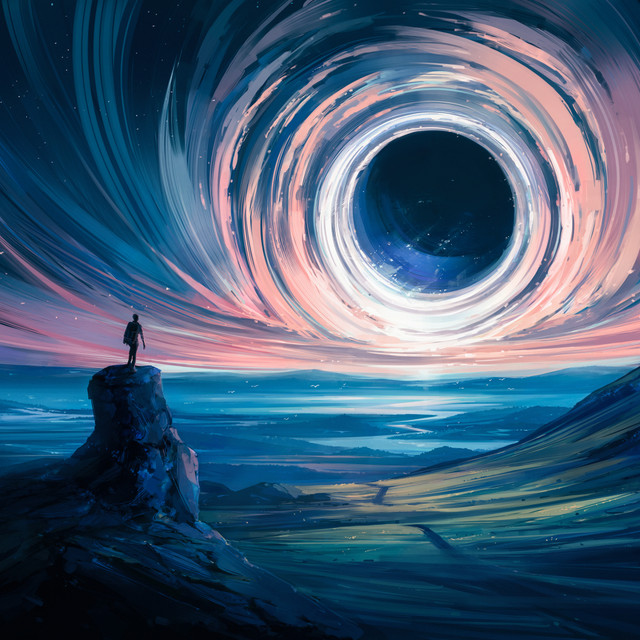

In [97]:
im

In [98]:
d ={'points': [{'x': -262.78537, 'y': 124.05785, 'z': 160.3969, 'curveNumber': 8, 'pointNumber': 8, 'text': 'His & Hers (feat. Don Toliver, Lil Uzi Vert & Gunna)'}]}

In [103]:
d['points'][0]['text']

'His & Hers (feat. Don Toliver, Lil Uzi Vert & Gunna)'

In [21]:
data = pd.read_csv('../.csv_caches/playlist_full.csv')

In [22]:
len(data)

1125

In [24]:
data.year

0       2021
1       2021
2       2021
3       2020
4       2021
        ... 
1120    2015
1121    2015
1122    2015
1123    2015
1124    2015
Name: year, Length: 1125, dtype: object

In [23]:
data['year'] = data.apply(lambda x:x.album_release_date.split('-')[0], axis=1)

In [25]:
df_year = data.groupby('year')

In [26]:
len(data)

1125

In [27]:
list(df_year.groups.keys())

['1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1968',
 '1969',
 '1972',
 '1977',
 '1980',
 '1983',
 '1984',
 '1986',
 '1987',
 '1988',
 '1990',
 '1993',
 '1994',
 '1995',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021']

In [30]:
years = ['2012']
artist_era =[]
for y in years:
    artist_era.extend(list(df_year.get_group(y).artist_names))

In [31]:
# artist_era = list(df_year.get_group('2021').artist_names)

In [32]:
# [*artist_era[10].split(',')]

In [33]:
t = []

In [34]:
_ = [ t.extend(a.split(',')) for a in  artist_era]

In [35]:
artists = [a.strip(' ') for a in t]

In [36]:
from collections import Counter

In [37]:
artist_counter = Counter(artists)

In [38]:
sorted_artists = sorted(artist_counter, key=artist_counter.get, reverse=True)

In [39]:
artist_counter

Counter({'Al Bowlly': 1,
         'Clinton Cerejo': 1,
         'Vishal Dadlani': 2,
         'Sonu Kakkar': 1,
         'Vishal-Shekhar': 2,
         'Shreya Ghoshal': 1,
         'Udit Narayan': 1,
         'Shekhar Ravjiani': 2,
         'Neeraj Shridhar': 1,
         'Kavita Seth': 1,
         'Salim Merchant': 1,
         'Neeti Mohan': 1,
         'David Hazeltine': 1,
         'Sammy Adams': 1,
         'Frédéric Chopin': 1,
         'Khatia Buniatishvili': 1,
         'Kanye West': 1,
         'Big Sean': 1,
         'Pusha T': 1,
         '2 Chainz': 1,
         'Marc Johnson': 1,
         'Eliane Elias': 1,
         'Steve Kuhn': 1,
         'Steve Swallow': 1,
         'Joey Baron': 1,
         'MKTO': 1})

In [40]:
sorted_artists

['Vishal Dadlani',
 'Vishal-Shekhar',
 'Shekhar Ravjiani',
 'Al Bowlly',
 'Clinton Cerejo',
 'Sonu Kakkar',
 'Shreya Ghoshal',
 'Udit Narayan',
 'Neeraj Shridhar',
 'Kavita Seth',
 'Salim Merchant',
 'Neeti Mohan',
 'David Hazeltine',
 'Sammy Adams',
 'Frédéric Chopin',
 'Khatia Buniatishvili',
 'Kanye West',
 'Big Sean',
 'Pusha T',
 '2 Chainz',
 'Marc Johnson',
 'Eliane Elias',
 'Steve Kuhn',
 'Steve Swallow',
 'Joey Baron',
 'MKTO']

In [46]:
px.histogram(data, 'year',)